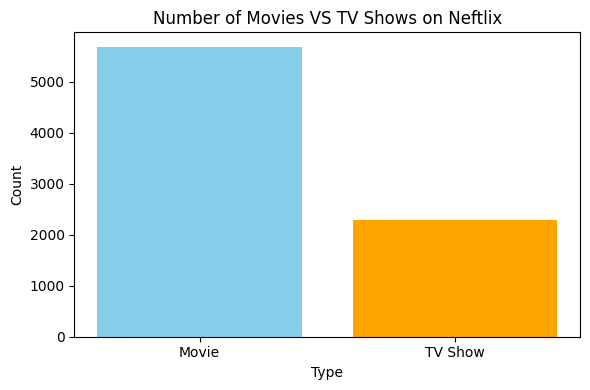

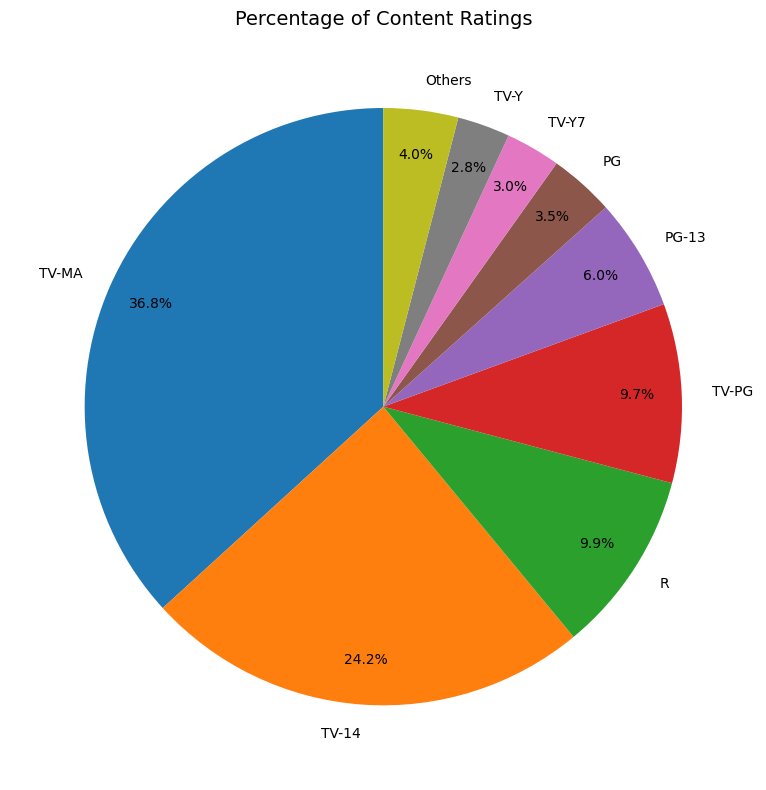

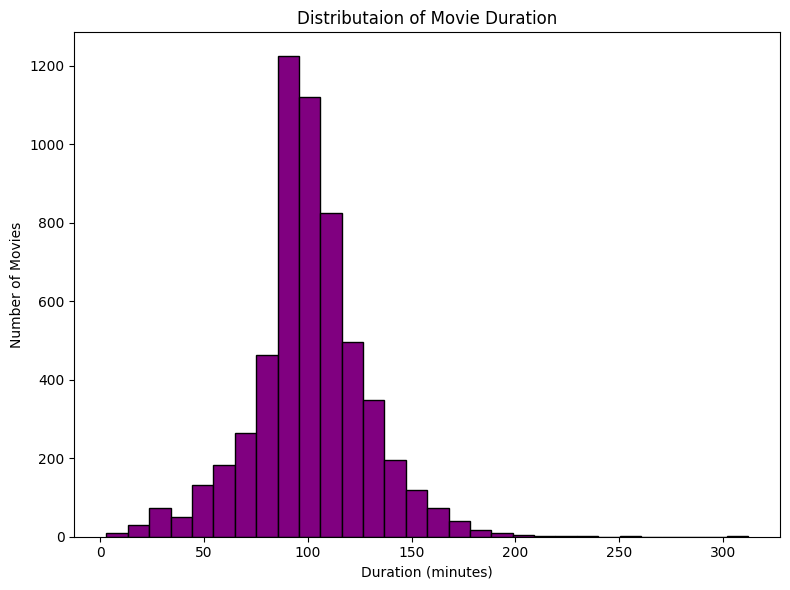

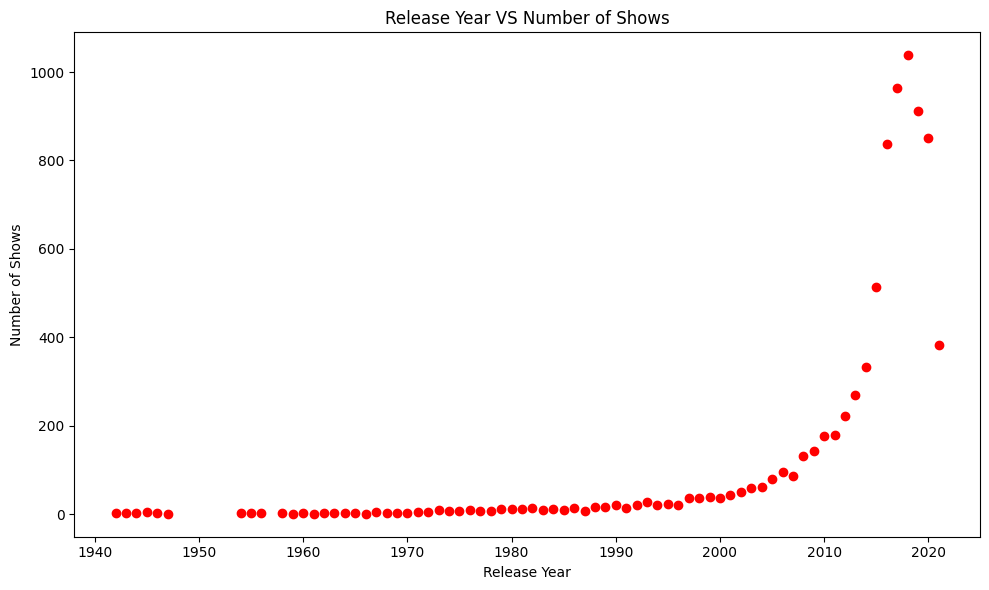

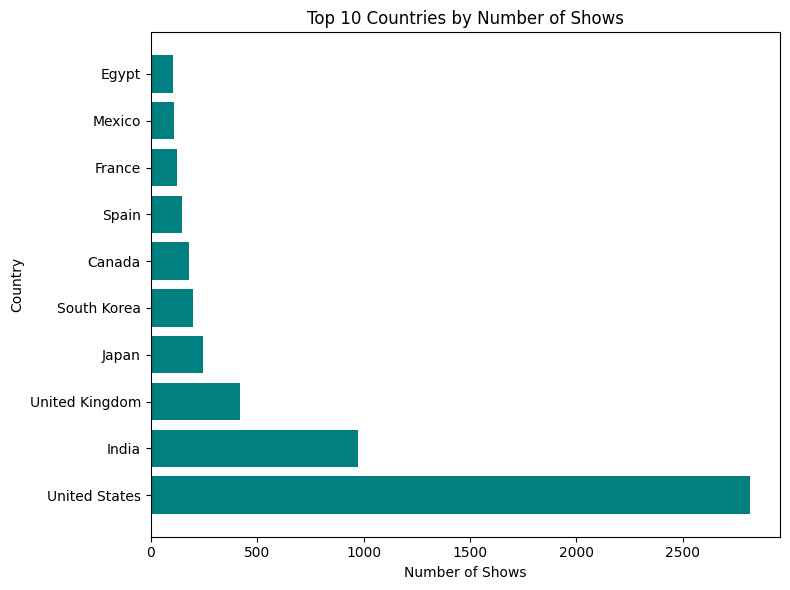

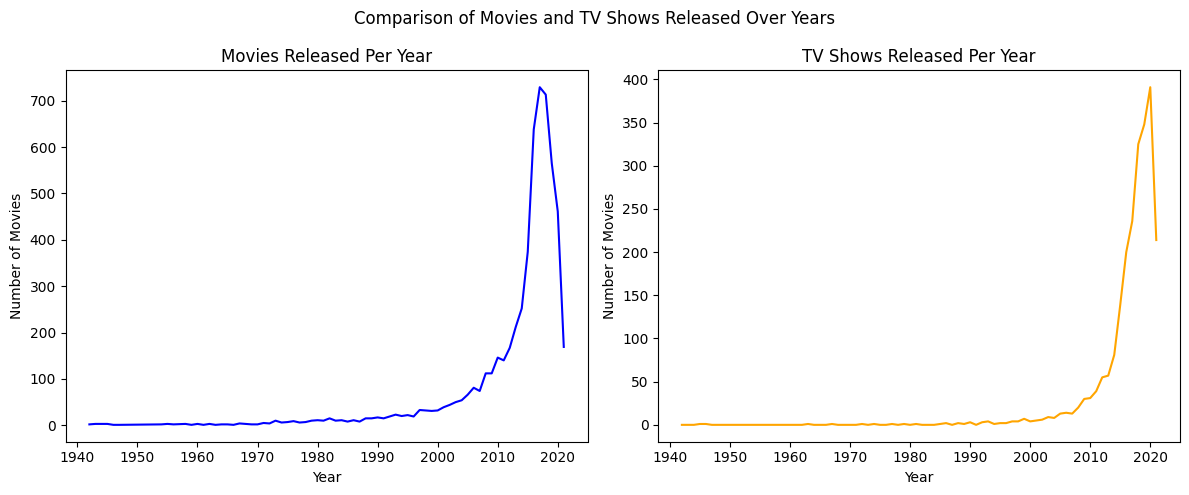

In [3]:
#s-1 import the libraries
import pandas as pd
import matplotlib.pyplot as plt

#load the data
df = pd.read_csv('netflix_titles.csv')

#clean data
df = df.dropna(subset=['type','release_year', 'rating', 'country', 'duration'])

#no. of movies and tv shows
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title('Number of Movies VS TV Shows on Neftlix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

#distribution of ratings
plt.figure(figsize=(8, 8))

# show only top 8 categories, rest combine as 'Others'
rating_counts = df['rating'].value_counts()
top8 = rating_counts[:8]
others = rating_counts[8:].sum()
top8['Others'] = others
plt.pie(top8, 
        labels=top8.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        pctdistance=0.85, 
        textprops={'fontsize':10})
plt.title('Percentage of Content Ratings', fontsize=14)
plt.tight_layout()
plt.savefig('rating_pie.png')
plt.show()


#duration of movies
movie_df = df[df['type'] == 'Movie'].copy()
movie_df ['duration_int'] = movie_df ['duration'].str.replace(' min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distributaion of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

#no. of released movies per year
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts. index, release_counts.values, color='red')
plt.title('Release Year VS Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_Scatter.png')
plt.show()


#top10 countries according to number of shows
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax =plt.subplots(1,2, figsize=(12,5))

#first subplot:movies
ax[0].plot(content_by_year.index, content_by_year ['Movie'], color='blue')
ax [0].set_title('Movies Released Per Year')
ax [0].set_xlabel('Year')
ax [0].set_ylabel('Number of Movies')

#second subplot:TV Shows
ax[1].plot(content_by_year.index, content_by_year ['TV Show'], color='orange')
ax [1].set_title('TV Shows Released Per Year')
ax [1].set_xlabel('Year')
ax [1].set_ylabel('Number of Movies')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')

plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()

